Владимир Кирилкин ПИ18-2

ML 2.1. Диагностика и кривые обучения
https://docs.google.com/document/d/1aITUCPyDcrx8Aeum1yjDK7vaOOQMtA4kk5yLqeXZQr4/edit

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2)

In [5]:
clf = SVC(C=0.01)

clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.676923076923077
0.6754385964912281


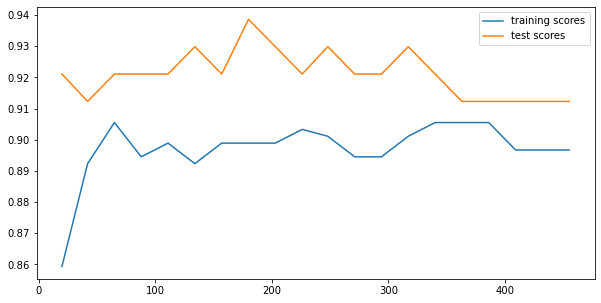

In [6]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):

    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)

    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Больше данных - лучше модель, что впринципе логично
### Варианты, которые могут привести к увеличению точности модели
* собрать больше объектов наблюдения
* добавить новые признаки в модель
* добавить полиномиальные признаки
* попробовать более сложные модели


Построим более сложную модель - случайный лел

Найдем лучшие параметры через GridCV

In [12]:
rfclf = RandomForestClassifier()
params = {
    'n_estimators': [100, 150, 200, 300, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 10],
    'min_samples_split': [2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample'],
}

In [15]:
gscv = GridSearchCV(rfclf, params, n_jobs = -1, verbose = 1, cv=3)

In [16]:
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 10.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 300, 500, 1000]},
             verbose=1)

In [17]:
gscv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 100}

Построим график обучения с зависимостью от объёма обучающей выборки

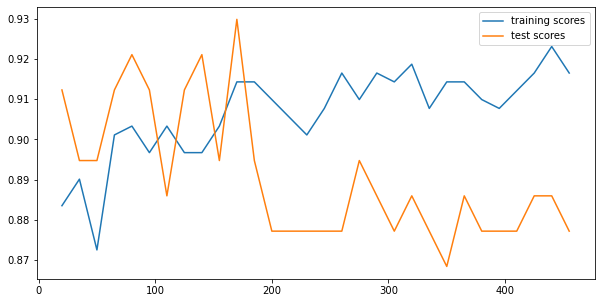

In [18]:
training_scores = []
test_scores = []
numbers = []
clf = RandomForestClassifier(**gscv.best_params_)
for i in np.linspace(20, len(X_train), 30):
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)

    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Как можно заметить на графике, лес (как и сами деревья) стремиться к переобучению

In [22]:
clf = RandomForestClassifier(**gscv.best_params_)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9230769230769231
0.8859649122807017


Проверяем как влияет параметр классификации

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[1.00000000e-04 1.01010102e+04 2.02020203e+04 3.03030304e+04
 4.04040405e+04 5.05050506e+04 6.06060607e+04 7.07070708e+04
 8.08080809e+04 9.09090910e+04 1.01010101e+05 1.11111111e+05
 1.21212121e+05 1.31313131e+05 1.41414142e+05 1.51515152e+05
 1.61616162e+05 1.71717172e+05 1.81818182e+05 1.91919192e+05
 2.02020202e+05 2.12121212e+05 2.22222222e+05 2.32323232e+05
 2.42424243e+05 2.52525253e+05 2.62626263e+05 2.72727273e+05
 2.82828283e+05 2.92929293e+05 3.03030303e+05 3.13131313e+05
 3.23232323e+05 3.33333333e+05 3.43434344e+05 3.53535354e+05
 3.63636364e+05 3.73737374e+05 3.83838384e+05 3.93939394e+05

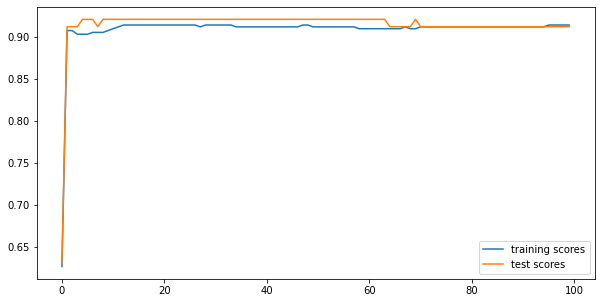

In [4]:
training_scores = []
test_scores = []
cs = np.linspace(0.0001, 1000000, 100)
numbers = []
i = 0

for C in cs:
    clf = SVC(C=C, kernel='rbf')
    clf.fit(X_train, y_train)
    numbers.append(i)
    i += 1
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(cs)
print(training_scores)
print(test_scores)

Лучшие результаты с 40404.0405 по 656565.6566

Теперь тоже самое для линейного ядра

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[1.00000000e-04 1.01010102e+04 2.02020203e+04 3.03030304e+04
 4.04040405e+04 5.05050506e+04 6.06060607e+04 7.07070708e+04
 8.08080809e+04 9.09090910e+04 1.01010101e+05 1.11111111e+05
 1.21212121e+05 1.31313131e+05 1.41414142e+05 1.51515152e+05
 1.61616162e+05 1.71717172e+05 1.81818182e+05 1.91919192e+05
 2.02020202e+05 2.12121212e+05 2.22222222e+05 2.32323232e+05
 2.42424243e+05 2.52525253e+05 2.62626263e+05 2.72727273e+05
 2.82828283e+05 2.92929293e+05 3.03030303e+05 3.13131313e+05
 3.23232323e+05 3.33333333e+05 3.43434344e+05 3.53535354e+05
 3.63636364e+05 3.73737374e+05 3.83838384e+05 3.93939394e+05

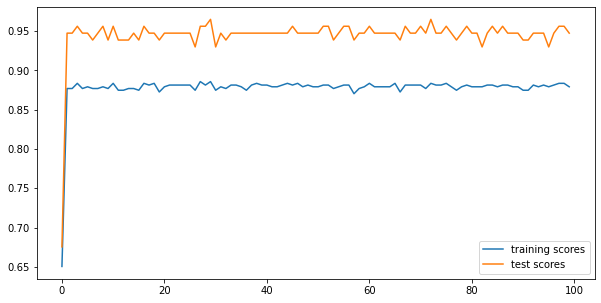

In [8]:

training_scores = []
test_scores = []
cs = np.linspace(0.0001, 1000000, 100)
numbers = []
i = 0

for C in cs:
    clf = SVC(C=C, kernel='linear')
    clf.fit(X_train, y_train)
    numbers.append(i)
    i += 1
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(cs)
print(training_scores)
print(test_scores)

Высокие значения начинаются уже с С=1.01010102e+04

Первый вариант оказывается чуть лучше